In [63]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from matplotlib import pyplot as plt
% matplotlib inline

In [64]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [65]:
df['const'] = [1]*len(df)

In [66]:
df.columns

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15', u'const'],
      dtype='object')

In [67]:
zips = set(df.zipcode.tolist())
len(zips)

70

array([  5.76058969e+04,   2.66111107e+02,   2.00052501e+02,
        -3.12406810e-01,  -2.59341445e+03,   1.33132945e+01,
         6.83791834e+04,   5.60511960e+05,   1.13723577e+02])

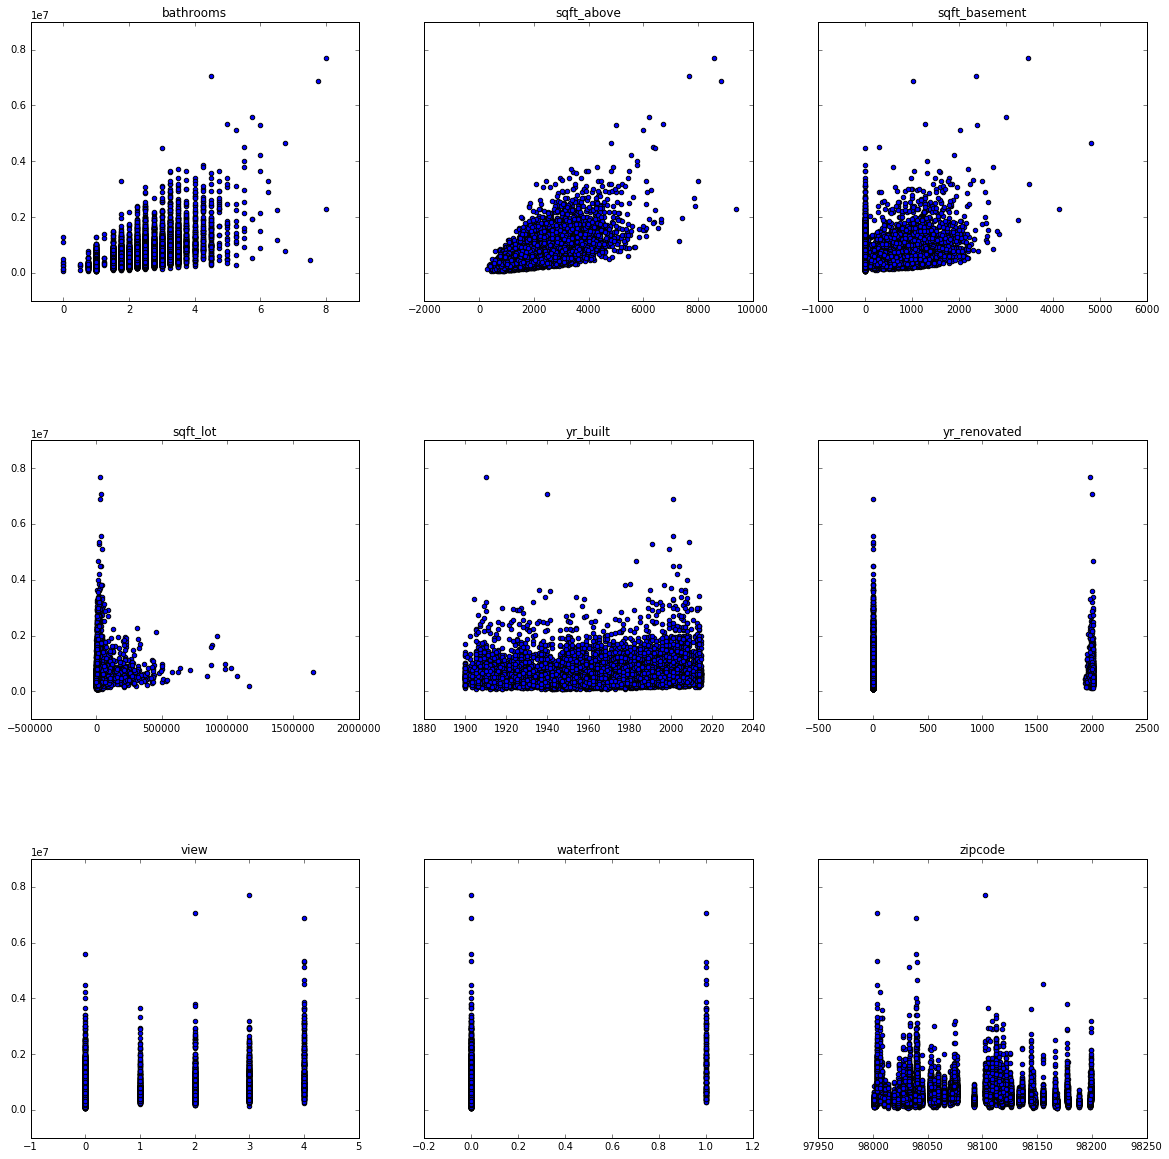

In [69]:
X = df[['bathrooms','sqft_above','sqft_basement','sqft_lot','yr_built','yr_renovated','view','waterfront','zipcode']]
y = df['price']
model = LR(normalize=True)
model.fit(X,y)

f, axarr = plt.subplots(3, 3, sharey='row', figsize=(20,20))
axarr[0, 0].scatter(X.bathrooms, y)
axarr[0, 0].set_title(X.columns[0])
axarr[0, 1].scatter(X.sqft_above, y)
axarr[0, 1].set_title(X.columns[1])
axarr[0, 2].scatter(X.sqft_basement, y)
axarr[0, 2].set_title(X.columns[2])
axarr[1, 0].scatter(X.sqft_lot, y)
axarr[1, 0].set_title(X.columns[3])
axarr[1, 1].scatter(X.yr_built, y)
axarr[1, 1].set_title(X.columns[4])
axarr[1, 2].scatter(X.yr_renovated, y)
axarr[1, 2].set_title(X.columns[5])
axarr[2, 0].scatter(X.view, y)
axarr[2, 0].set_title(X.columns[6])
axarr[2, 1].scatter(X.waterfront, y)
axarr[2, 1].set_title(X.columns[7])
axarr[2, 2].scatter(X.zipcode, y)
axarr[2, 2].set_title(X.columns[8])
f.subplots_adjust(hspace=0.5)

model.coef_

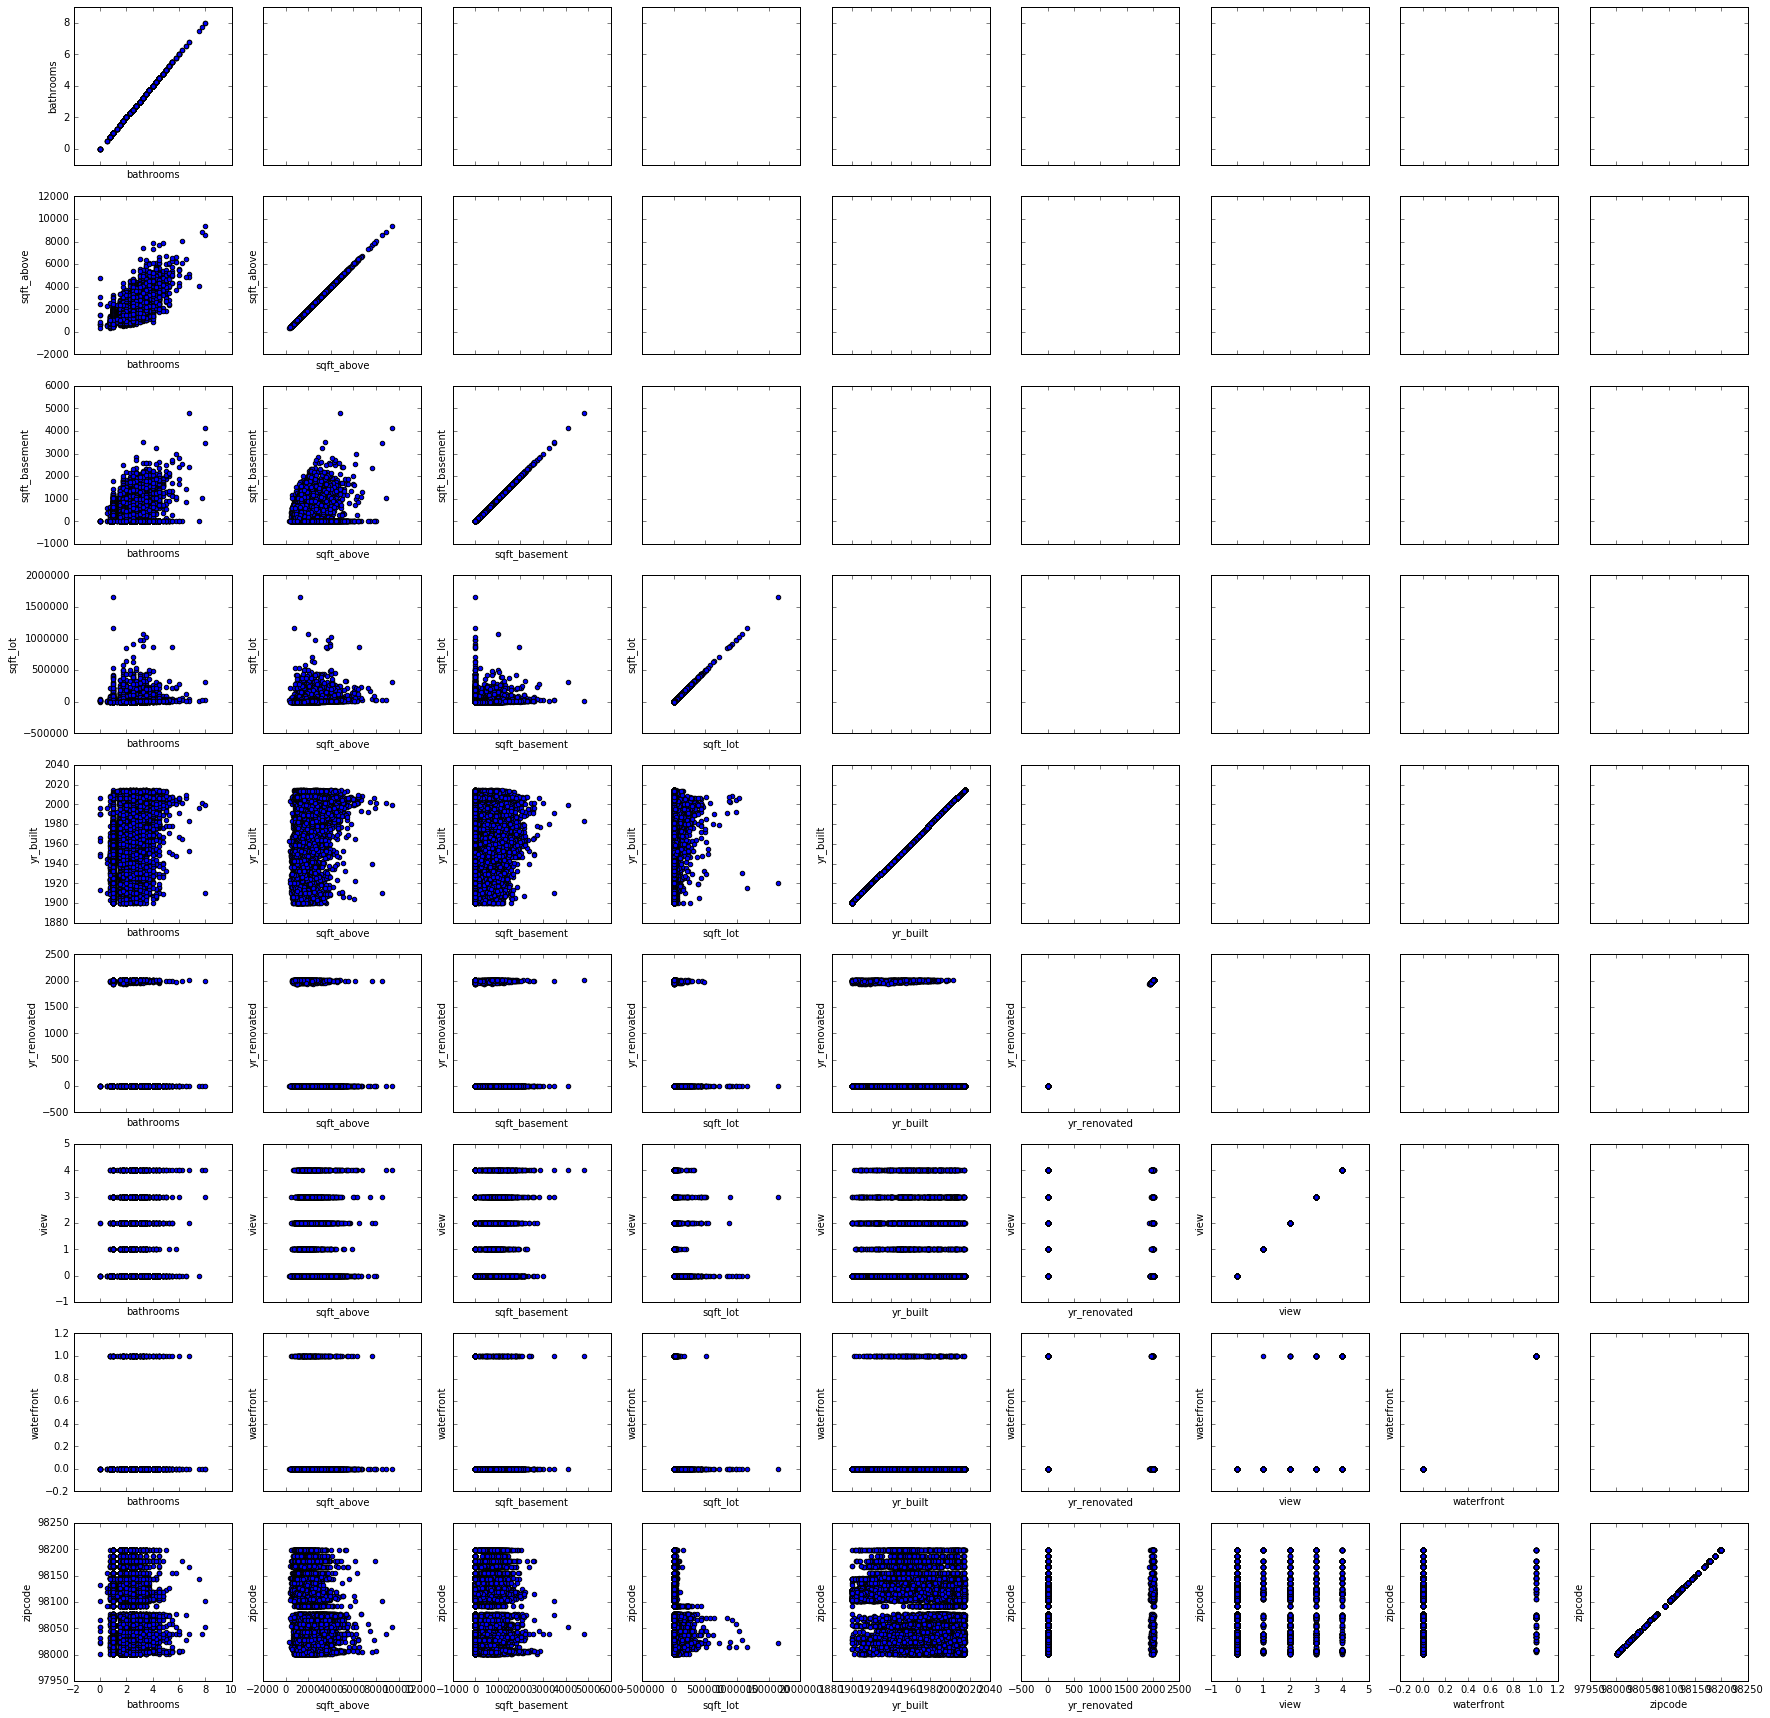

In [77]:
nfeature = len(X.columns) 
f, axarr = plt.subplots(nfeature, nfeature, sharey='row', sharex='col', figsize=(30,30))
for yy in range(nfeature):
    for xx in range(nfeature):
        if yy >= xx:
            axarr[yy, xx].scatter(X.iloc[:,xx], X.iloc[:,yy])
            axarr[yy, xx].set_xlabel(X.columns[xx])
            axarr[yy, xx].set_ylabel(X.columns[yy])

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, whiten=True).fit(X)
X_pca = pca.transform(X)
print pca.components_
print pca.explained_variance_ratio_
print sum(pca.explained_variance_ratio_)

[[  1.63232331e-06   3.67022354e-03   1.63306855e-04   9.99993234e-01
    3.76630989e-05   7.41466475e-05   1.38241518e-06   4.51352966e-08
   -1.67399517e-04]]
[ 0.99940382]
0.99940381597


### Feature Selection: Univariate Selection
* http://blog.datadive.net/selecting-good-features-part-i-univariate-selection/

#### Pearson Correlation
Scipy‘s pearsonr method computes both the correlation and p-value for the correlation, roughly showing the probability of an uncorrelated system creating a correlation value of this magnitude.

In [72]:
from scipy.stats import pearsonr
for feature in X.columns:
    print feature , pearsonr(X[feature], y)

bathrooms (0.52513750541396187, 0.0)
sqft_above (0.60556729835607825, 0.0)
sqft_basement (0.32381602071198395, 0.0)
sqft_lot (0.089660860587100114, 7.9725045103261473e-40)
yr_built (0.054011531494792715, 1.929872809374955e-15)
yr_renovated (0.12643379344089295, 1.0213478858043326e-77)
view (0.39729348829450428, 0.0)
waterfront (0.26636943403060209, 0.0)
zipcode (-0.053202854298325608, 5.0110505033187622e-15)


##### view by zipcode

In [ ]:
grps = df.groupby(['zipcode'])
for name, group in grps:
    print name 
    print group
    nhouse = len(group)
    if nhouse > 1:
        X = group[['bedrooms','bathrooms','sqft_above','sqft_basement','sqft_lot','yr_built','yr_renovated','view','waterfront']]
        y = group['price']
        model = LR(normalize=True)
        model.fit(X,y)
        